# Linear Regression

Suppose we have a dependent variable $y$ and dependent variables $x = (x_1, x_2, \dots, x_n)$. The general form for a linear regression models that predicts the dependent variable is,

$$
f(x) = b + w_1 x_1 + w_2 x_2 + \dots + w_n x_n.
$$

Where $b$ is a bias term. Let us convert these term into matrices and vectors. Suppose we make $m$ observations so we have $m$ dependection variables,

$$
Y = \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
    y_m
\end{bmatrix}
$$

And $m$ dependent variables each comprised of $n$ features,

$$
X = \begin{bmatrix}
    1      && x_{11} &&  x_{12} && \dots && x_{1n} \\
    1      && x_{21} &&  x_{22} && \dots && x_{2n} \\
    \vdots && \vdots &&  \vdots && \dots && \vdots \\
    1      && x_{m1} &&  x_{m2} && \dots && x_{mn} \\
\end{bmatrix}
$$

The column of ones is included for the bias term $b$. We want to find a weight vector,

$$
W = \begin{bmatrix}
    b \\
    w_1 \\
    w_2 \\
    \vdots \\
    w_m
\end{bmatrix}
$$

Such that our predictions $\hat{Y} = X W$ are as close to $Y$ as possible.

We find such a $W$ using the pseudoinverse.

$$
\begin{align}
    Y & = X W \\
    Y & = X^T X W \\
    X^T Y & = X^T X W \\
    (X^T X) ^ {-1} X^T Y & = (X^T X) ^ {-1} X^T X W \\
    (X^T X) ^ {-1} X^T Y & = W \\
\end{align}
$$

the matrix $(X^T X) ^ {-1} X^T$ is called the psuedoinverse.

# Simple Linear Example

Suppose we are trying to model a linear function.

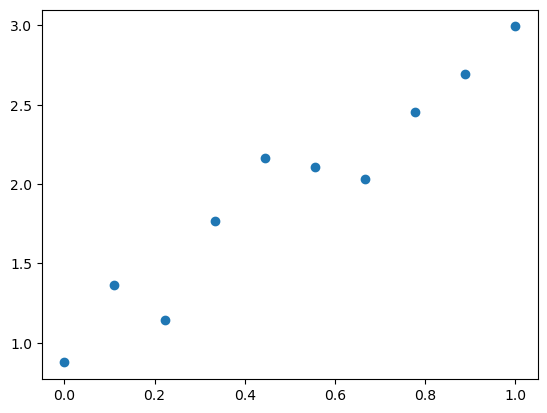

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

m = 10
X = np.vstack((np.ones(m), np.linspace(0, 1, m))).T
Y = 2 * X[:, 1] + 1 + np.random.normal(scale=0.2, size=(m))

plt.scatter(X[:, 1], Y, marker="o")

Now we have our data, let us write out model.

In [ ]:
class LinearRegression:
    def __init__(self):
        self.W = None

    def fit(self, X, Y):
        self.W = np.linalg.inv(X.T @ X) @ X.T @ Y

    def predict(self, X):
        return X @ self.W

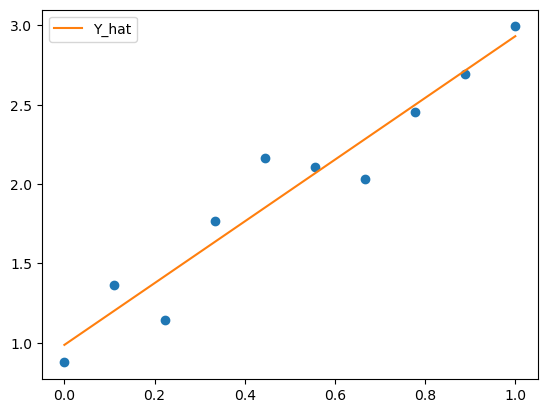

In [ ]:
model = LinearRegression()
model.fit(X, Y)
Y_hat = model.predict(X)

plt.scatter(X[:, 1], Y, marker="o")
plt.plot(X[:, 1], Y_hat, color="tab:orange", label="Y_hat")
plt.legend()

If we look at the parameters of the model, we should find they are similar to the parameters we used to generate the data.

In [ ]:
model.W

array([0.98689721, 1.94516279])

The first number is the intercept which was 1 and the second number is the gradient which was 2.

## Fitting our model to a more complicated function

Now let us fit the linear regression model to a sine function

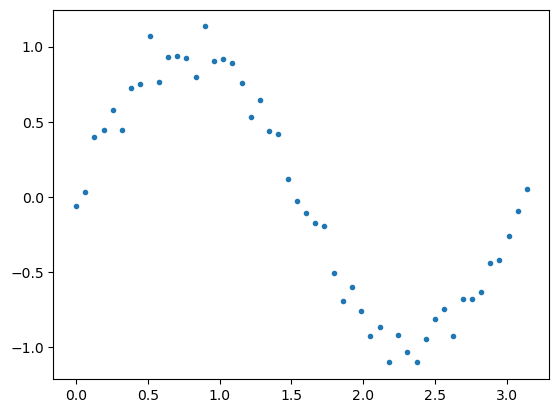

In [ ]:
m = 50
x = np.linspace(0, np.pi, m)
X = np.vstack((
    np.ones(m),
    x,
)).T
Y = np.sin(2 * x) + np.random.normal(scale=0.1, size=m)

plt.scatter(x, Y, marker='.')

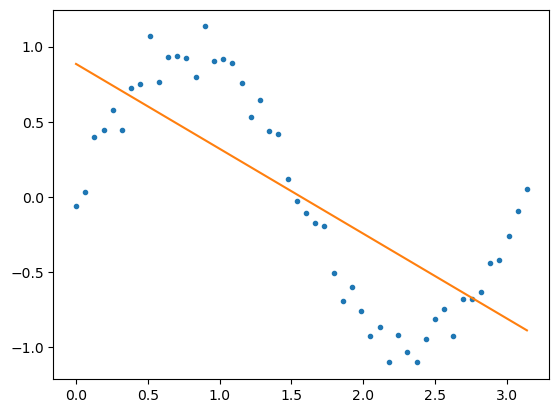

In [ ]:
model.fit(X, Y)
Y_hat = model.predict(X)

plt.scatter(x, Y, marker='.')
plt.plot(x, Y_hat, color='tab:orange')

Our models prediction is quite poor. We can try and improve it by adding higher power terms to the model.

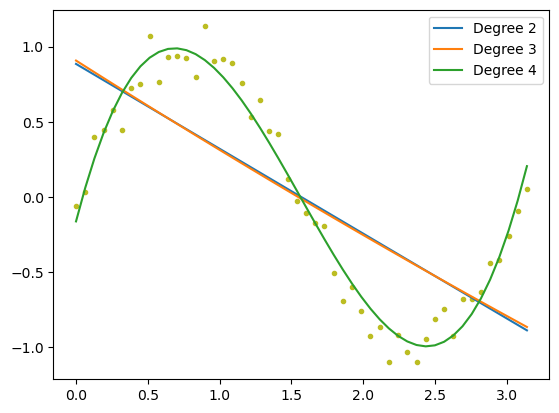

In [ ]:
for i in range(2, 5):
    X = np.stack([x ** p for p in range(i)]).T
    model.fit(X, Y)
    Y_hat = model.predict(X)
    plt.plot(x, Y_hat, label=f"Degree {i}")

plt.scatter(x, Y, marker='.', color='tab:olive')
plt.legend()

The degree 4 model performs the best.

## Gradient Descent

In the previous section we looked at finding an analytic solutions for the weights, $W$, of the model. Now we look at gradient descent which the weights by iteratively improving the guess for the weights.

It does this by using a loss function, in this case mean squared error, that gives us a measure of how good the prediction is.

$$
\text{MSE} = \frac{1}{m} \sum_{i=1}^{m}(\hat{y}_i - y_i)^2.
$$

Or equally

$$
\begin{align}
\text{MSE} = & \frac{1}{m} \sum_{i=1}^{m}(X_i W - y_i)^2 \\
           = & \frac{1}{m} \sum_{i=1}^{m}\left(\sum_{j=1}^{m}x_{ij}w_j - y_i\right)^2 \\
\end{align}
$$

We can then find the gradient of the mean squared error with respect to each weight $w_j$. We find the gradient using the chain rule.

$$
\begin{align}
\frac{\partial \text{MSE}}{\partial w_k} = & \frac{1}{m} \sum_i x_{ij} \left(\sum_j x_{ij} w_j - y_i\right) \\
    = & \frac{1}{m} \sum_i x_{ik} \left(X_i W - y_i\right) \\
    = & \frac{1}{m} \sum_i x_{ik} X_i W - \frac{1}{m} \sum_i x_{ik} y_i \\
    = & \frac{1}{m} (X_{,k} X W - X_{,k} Y)
\end{align}
$$

Now let us implement this.


In [ ]:
class GradientDescent():
    def __init__(self, n_iter=500, learning_rate=0.01):
        self.n_iter = n_iter
        self.W = None
        self.W_hist = None
        self.loss_hist = None
        self.learning_rate = learning_rate

    def fit(self, X, Y):
        m, n = X.shape
        self.W = np.random.normal(size=n)
        self.loss_hist = np.zeros(self.n_iter)
        self.W_hist = np.zeros((self.n_iter, n))

        for i in range(self.n_iter):
            loss = np.mean((X @ self.W - Y) ** 2)
            grad = (2 / m) * (X.T @ X @ self.W - X.T @ Y)
            self.W -= self.learning_rate * grad

            self.loss_hist[i] = loss
            self.W_hist[i] = self.W

    def predict(self, X):
        return X @ self.W

Text(0.5, 0, 'Iteration')

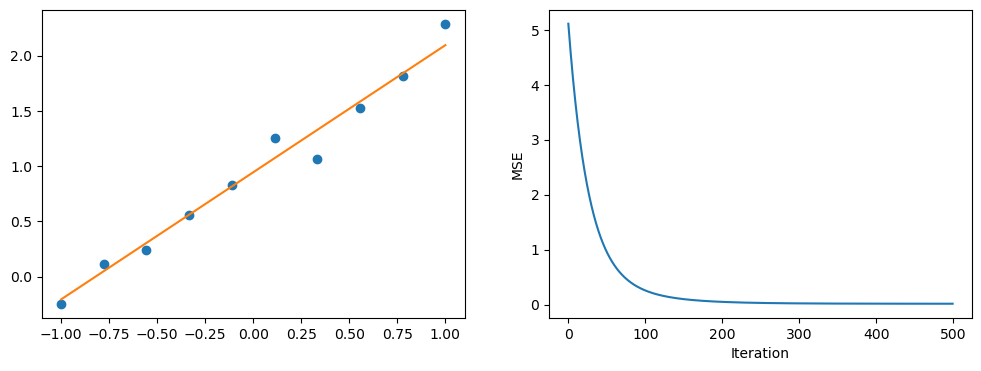

In [ ]:
m = 10
x = np.linspace(-1, 1, m)
X = np.vstack((
    np.ones(m),
    x,
)).T

Y = 1 * x + 1 + np.random.normal(scale=0.2, size=(m))

model = GradientDescent()
model.fit(X, Y)
Y_hat = model.predict(X)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].scatter(x, Y)
ax[0].plot(x, Y_hat, color="tab:orange")
ax[1].plot(model.loss_hist)

ax[1].set_ylabel("MSE")
ax[1].set_xlabel("Iteration")

On the left we have the fit of the model and on the right we have the loss curve.